<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Project & Dataset Overview</div>
    <center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/a/ae/Prefrontal1.png" width="400" style="margin-top: 20px;">
</center>

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Library Load </div>
    <center>
  

In [127]:
library(SpatialExperiment)
library(STexampleData)

In [5]:
library(ggspavis)

Loading required package: ggplot2

Registered S3 method overwritten by 'ggside':
  method from   
  +.gg   ggplot2



In [109]:
library(scater)
library(scran)

In [192]:
library(pheatmap)

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Load data </div>
    <center>

In [10]:
# load object
spe <- Visium_humanDLPFC()

see ?STexampleData and browseVignettes('STexampleData') for documentation

loading from cache



In [12]:
# save object(s)
saveRDS(spe, file = "spe_load.rds")

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'object' in selecting a method for function 'containsOutOfMemoryData': no slot of name "metadata" for this object of class "LoadedSpatialImage"


In [14]:
#check object
spe

class: SpatialExperiment 
dim: 33538 4992 
metadata(0):
assays(1): counts
rownames(33538): ENSG00000243485 ENSG00000237613 ... ENSG00000277475
  ENSG00000268674
rowData names(3): gene_id gene_name feature_type
colnames(4992): AAACAACGAATAGTTC-1 AAACAAGTATCTCCCA-1 ...
  TTGTTTGTATTACACG-1 TTGTTTGTGTAAATTC-1
colData names(8): barcode_id sample_id ... reference cell_count
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):
spatialCoords names(2) : pxl_col_in_fullres pxl_row_in_fullres
imgData names(4): sample_id image_id data scaleFactor

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Quality control </div>
    <center>

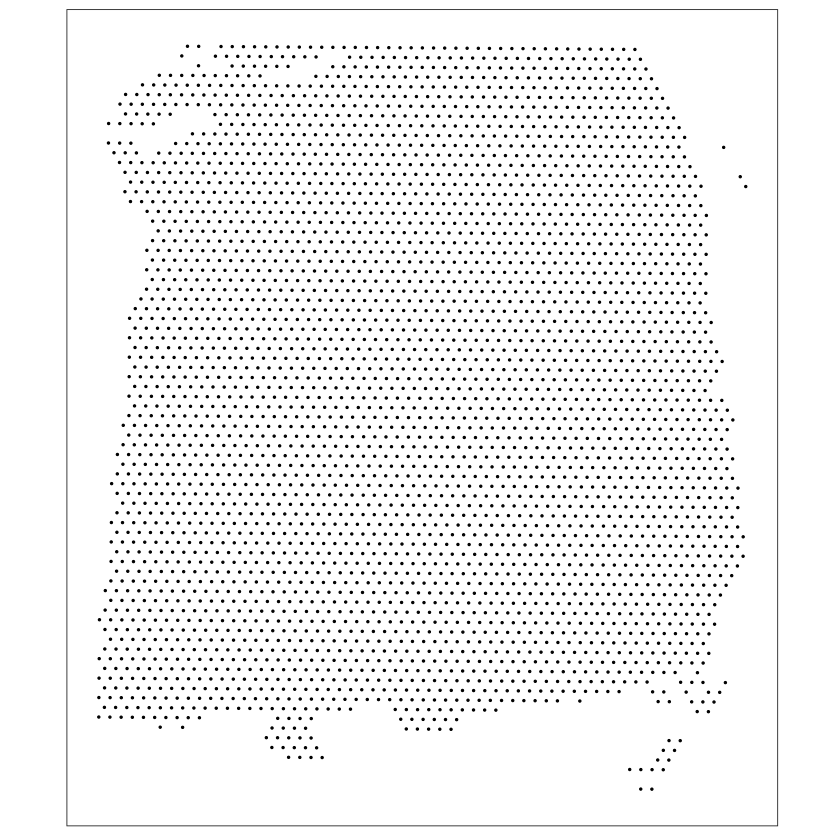

In [17]:
# plot spatial coordinates (spots)
plotSpots(spe)

In [19]:
# subset to keep only spots over tissue
spe <- spe[, colData(spe)$in_tissue == 1]
dim(spe)

[1] 33538  3639

In [20]:
# identify mitochondrial genes
is_mito <- grepl("(^MT-)|(^mt-)", rowData(spe)$gene_name)
table(is_mito)

is_mito
FALSE  TRUE 
33525    13 

In [22]:
rowData(spe)$gene_name[is_mito]

[1] "MT-ND1"  "MT-ND2"  "MT-CO1"  "MT-CO2"  "MT-ATP8" "MT-ATP6" "MT-CO3" 
 [8] "MT-ND3"  "MT-ND4L" "MT-ND4"  "MT-ND5"  "MT-ND6"  "MT-CYB"

In [24]:
# calculate per-spot QC metrics and store in colData
spe <- addPerCellQC(spe, subsets = list(mito = is_mito))
head(colData(spe))

DataFrame with 6 rows and 14 columns
                           barcode_id     sample_id in_tissue array_row
                          <character>   <character> <integer> <integer>
AAACAAGTATCTCCCA-1 AAACAAGTATCTCCCA-1 sample_151673         1        50
AAACAATCTACTAGCA-1 AAACAATCTACTAGCA-1 sample_151673         1         3
AAACACCAATAACTGC-1 AAACACCAATAACTGC-1 sample_151673         1        59
AAACAGAGCGACTCCT-1 AAACAGAGCGACTCCT-1 sample_151673         1        14
AAACAGCTTTCAGAAG-1 AAACAGCTTTCAGAAG-1 sample_151673         1        43
AAACAGGGTCTATATT-1 AAACAGGGTCTATATT-1 sample_151673         1        47
                   array_col ground_truth   reference cell_count       sum
                   <integer>  <character> <character>  <integer> <numeric>
AAACAAGTATCTCCCA-1       102       Layer3      Layer3          6      8458
AAACAATCTACTAGCA-1        43       Layer1      Layer1         16      1667
AAACACCAATAACTGC-1        19           WM          WM          5      3769
AAACAGAGCGAC

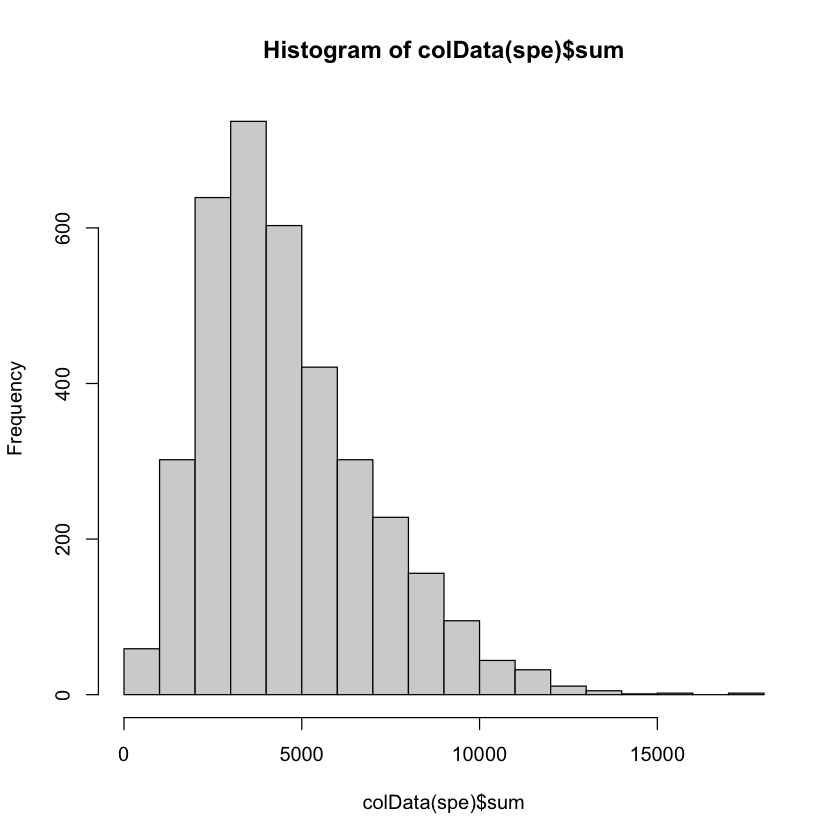

In [26]:
# histogram of library sizes
hist(colData(spe)$sum, breaks = 20)

`geom_smooth()` using formula = 'y ~ x'
`stat_xsidebin()` using `bins = 30`. Pick better value with
`binwidth`.
`stat_ysidebin()` using `bins = 30`. Pick better value with
`binwidth`.


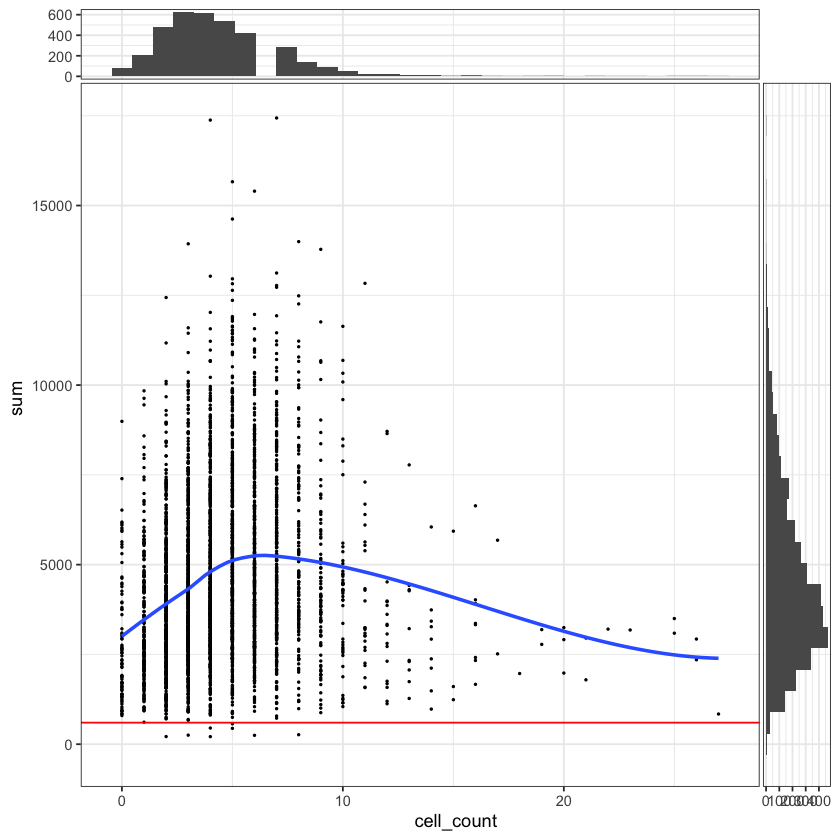

In [28]:
# plot library size vs. number of cells per spot
plotSpotQC(spe, plot_type = "scatter", 
           x_metric = "cell_count", y_metric = "sum", 
           y_threshold = 600)

In [30]:
# select QC threshold for library size
qc_lib_size <- colData(spe)$sum < 600
table(qc_lib_size)

qc_lib_size
FALSE  TRUE 
 3631     8 

In [32]:
colData(spe)$qc_lib_size <- qc_lib_size

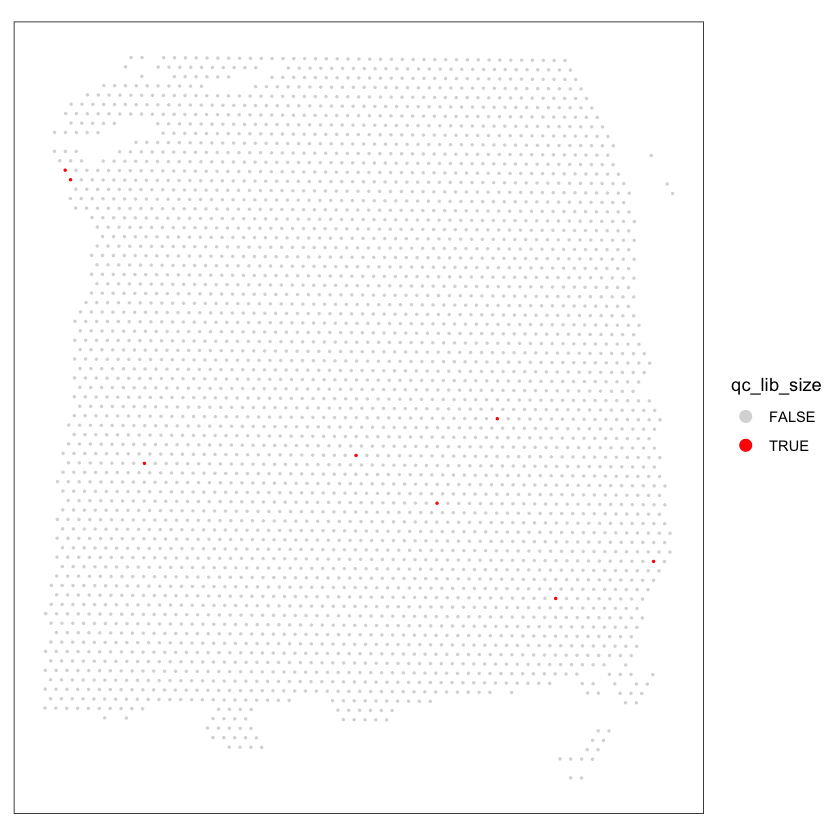

In [34]:
# check spatial pattern of discarded spots
plotSpotQC(spe, plot_type = "spot", 
           annotate = "qc_lib_size")

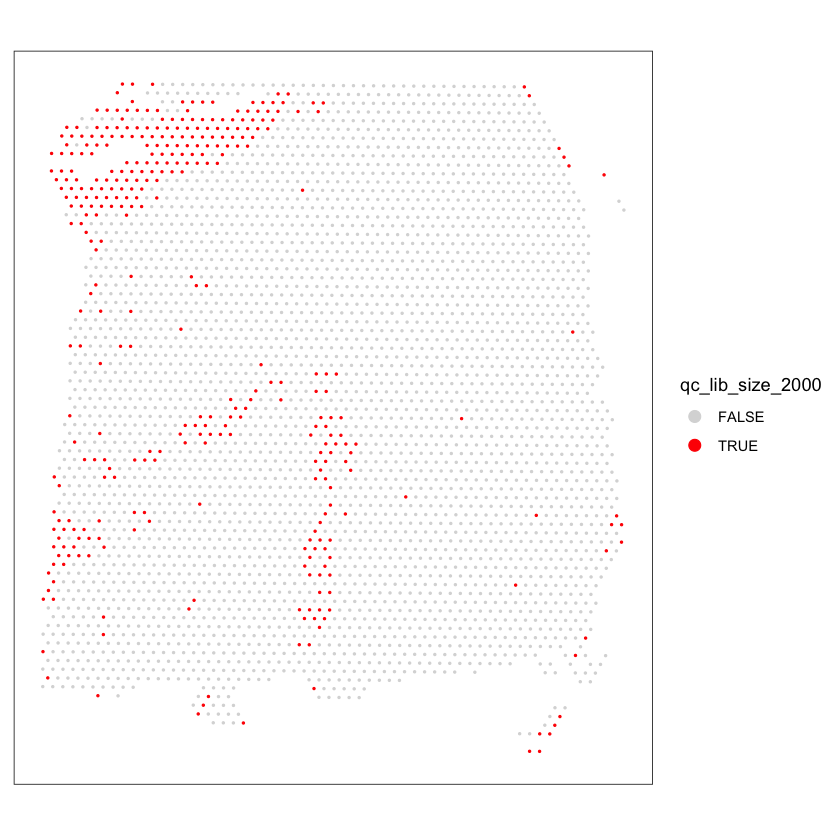

In [36]:
# check spatial pattern of discarded spots if threshold is too high
qc_lib_size_2000 <- colData(spe)$sum < 2000
colData(spe)$qc_lib_size_2000 <- qc_lib_size_2000
plotSpotQC(spe, plot_type = "spot", 
           annotate = "qc_lib_size_2000")

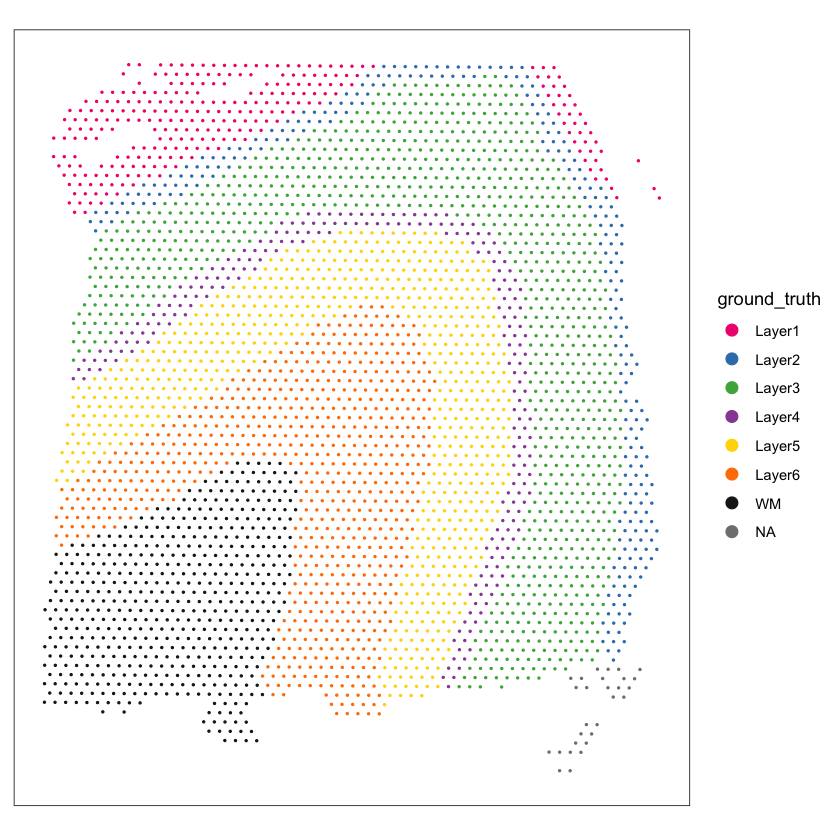

In [38]:
# plot reference (manually annotated) layers
plotSpots(spe, annotate = "ground_truth", 
          pal = "libd_layer_colors")

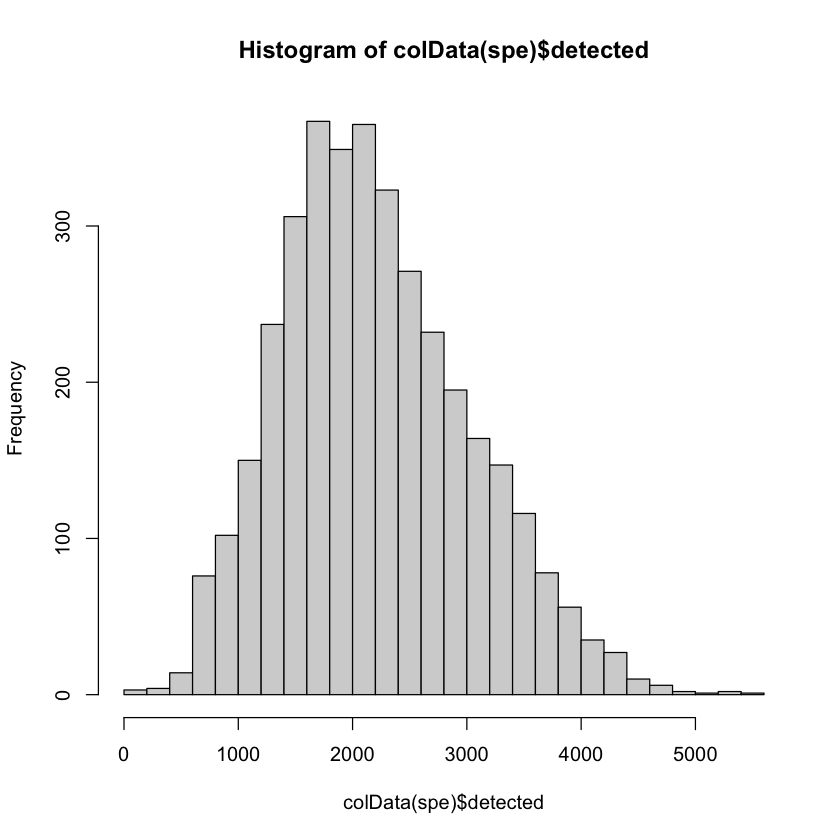

In [40]:
# histogram of numbers of expressed genes
hist(colData(spe)$detected, breaks = 20)

`geom_smooth()` using formula = 'y ~ x'
`stat_xsidebin()` using `bins = 30`. Pick better value with
`binwidth`.
`stat_ysidebin()` using `bins = 30`. Pick better value with
`binwidth`.


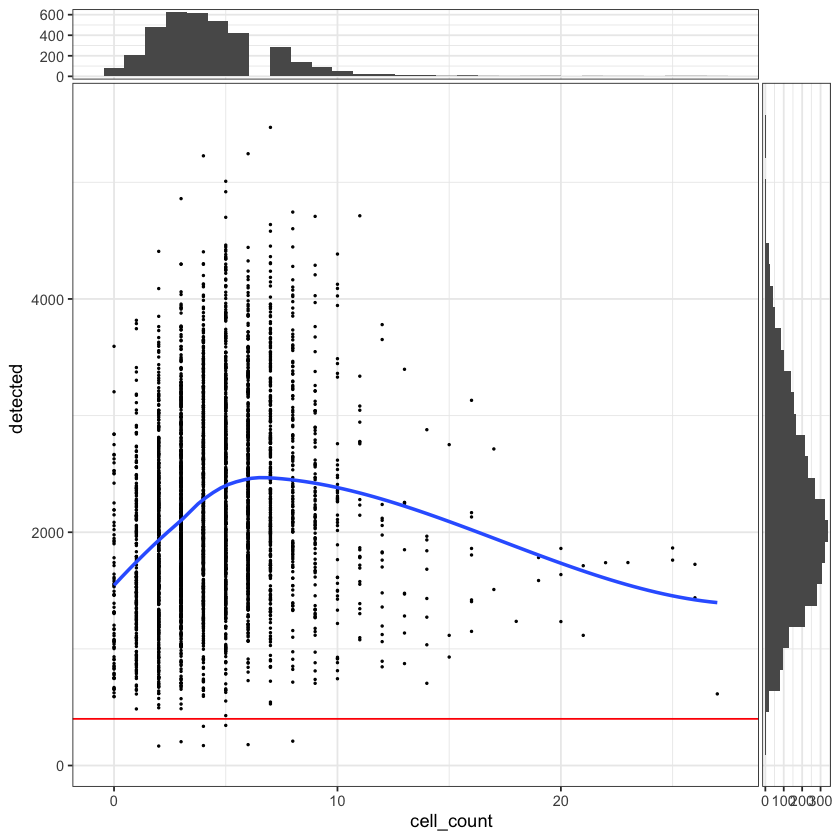

In [42]:
# plot number of expressed genes vs. number of cells per spot
plotSpotQC(spe, plot_type = "scatter", 
           x_metric = "cell_count", y_metric = "detected", 
           y_threshold = 400)

In [44]:
# select QC threshold for number of expressed genes
qc_detected <- colData(spe)$detected < 400
table(qc_detected)

qc_detected
FALSE  TRUE 
 3632     7 

In [46]:
colData(spe)$qc_detected <- qc_detected

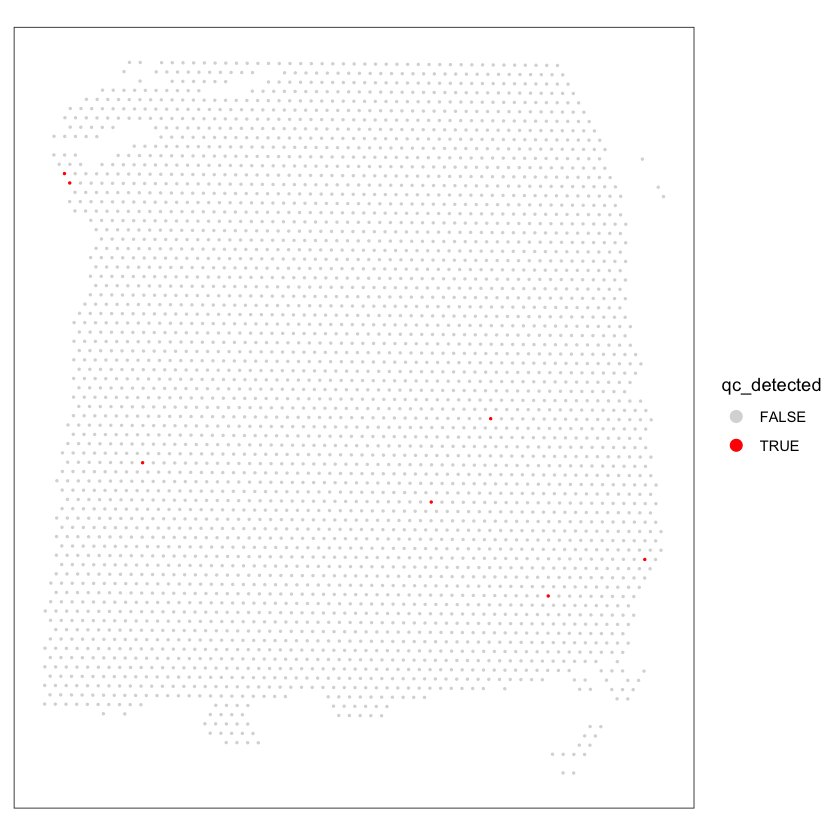

In [48]:
# check spatial pattern of discarded spots
plotSpotQC(spe, plot_type = "spot", 
           annotate = "qc_detected")

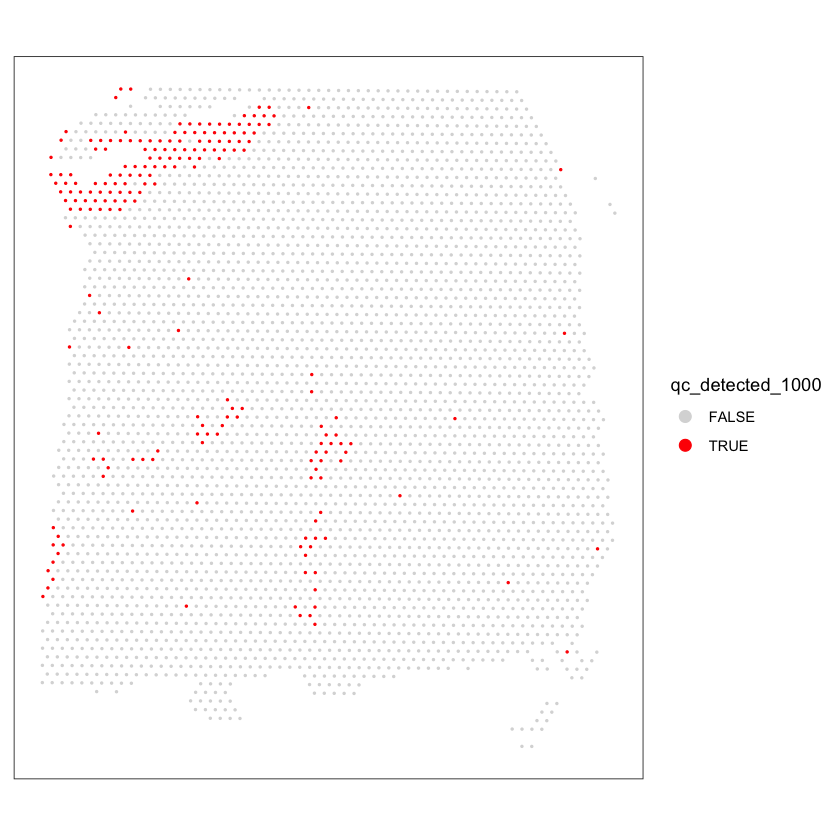

In [50]:
# check spatial pattern of discarded spots if threshold is too high
qc_detected_1000 <- colData(spe)$detected < 1000
colData(spe)$qc_detected_1000 <- qc_detected_1000
plotSpotQC(spe, plot_type = "spot", 
           annotate = "qc_detected_1000")

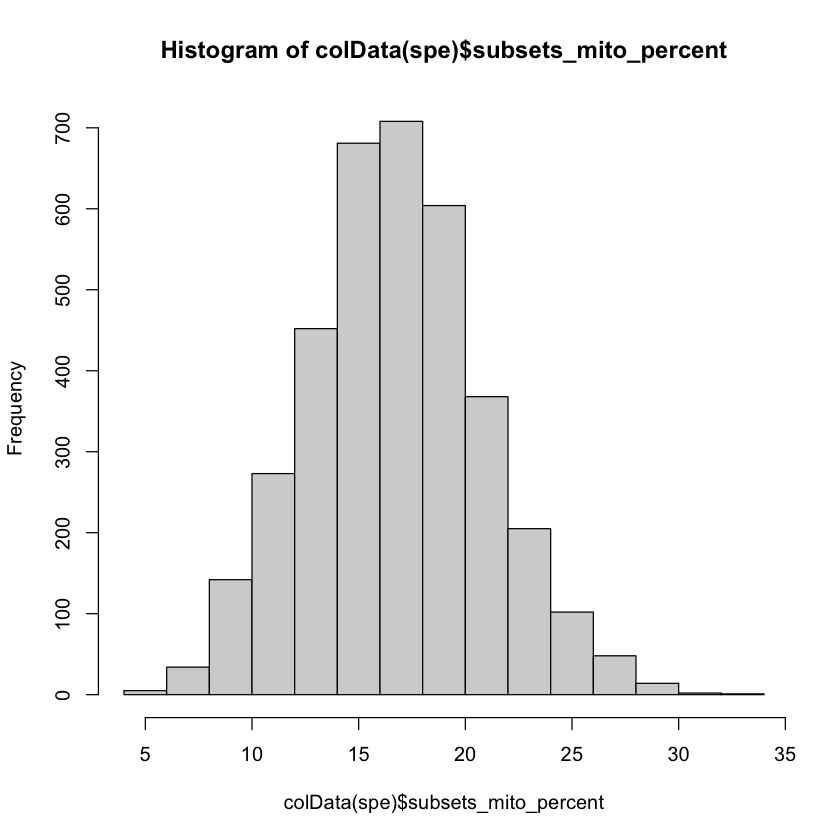

In [52]:
# histogram of mitochondrial read proportions
hist(colData(spe)$subsets_mito_percent, breaks = 20)

`geom_smooth()` using formula = 'y ~ x'
`stat_xsidebin()` using `bins = 30`. Pick better value with
`binwidth`.
`stat_ysidebin()` using `bins = 30`. Pick better value with
`binwidth`.


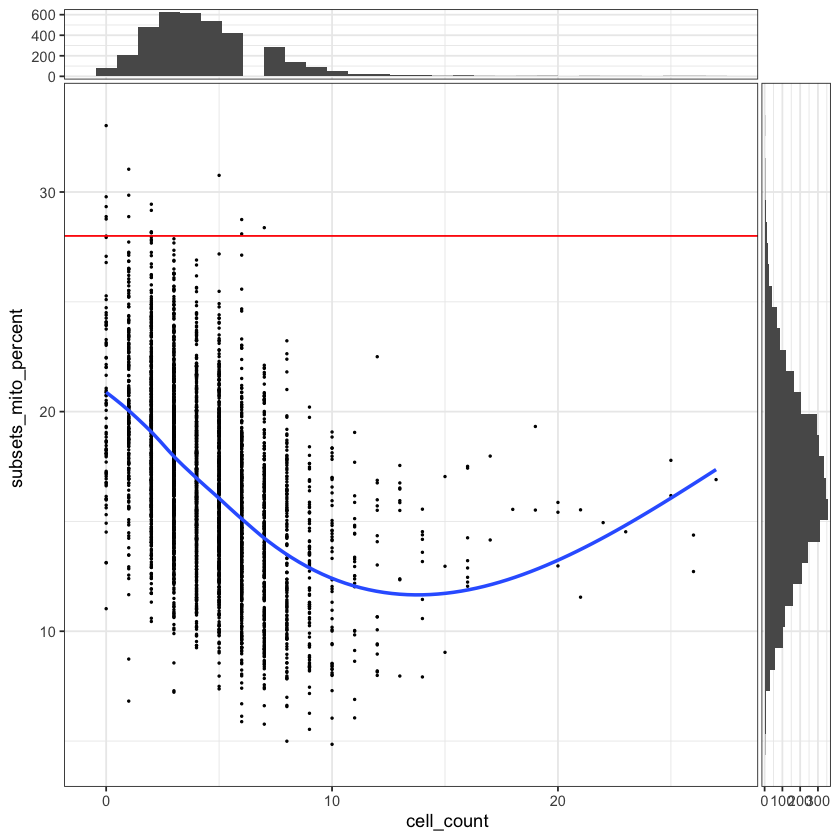

In [54]:
# plot mitochondrial read proportion vs. number of cells per spot
plotSpotQC(spe, plot_type = "scatter", 
           x_metric = "cell_count", y_metric = "subsets_mito_percent", 
           y_threshold = 28)

In [56]:
# select QC threshold for mitochondrial read proportion
qc_mito <- colData(spe)$subsets_mito_percent > 28
table(qc_mito)

qc_mito
FALSE  TRUE 
 3622    17 

In [58]:
colData(spe)$qc_mito <- qc_mito

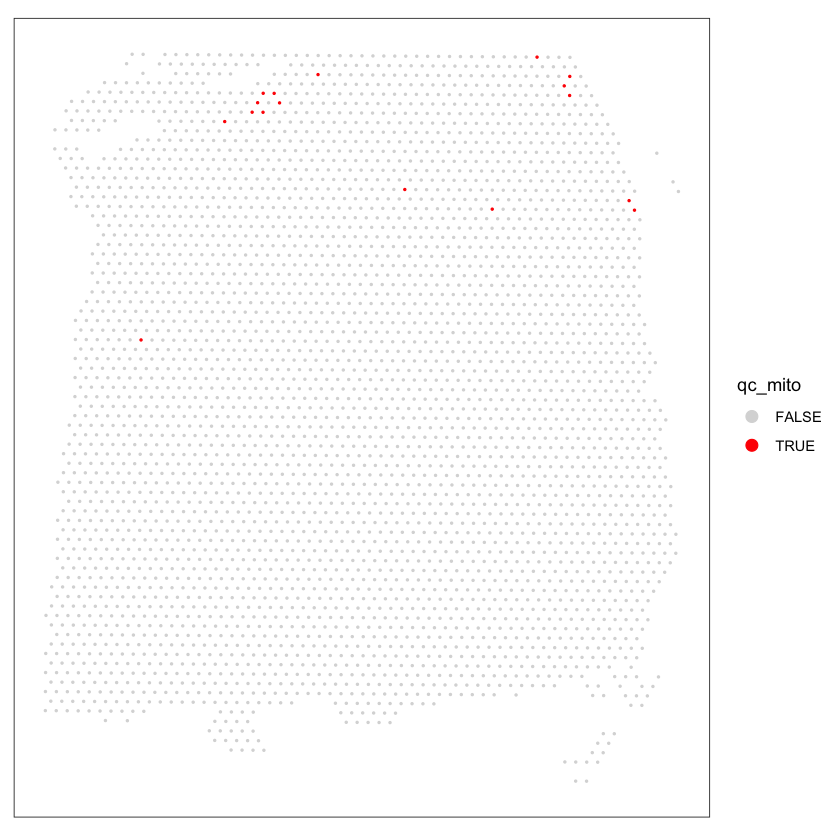

In [60]:
# check spatial pattern of discarded spots
plotSpotQC(spe, plot_type = "spot", 
           annotate = "qc_mito")

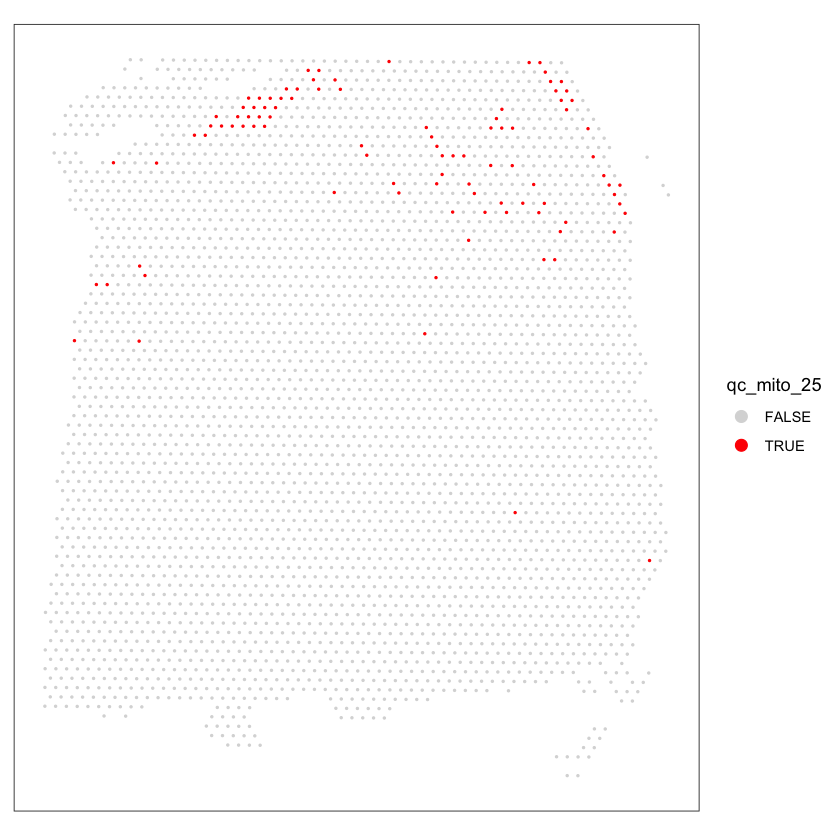

In [62]:
# check spatial pattern of discarded spots if threshold is too high
qc_mito_25 <- colData(spe)$subsets_mito_percent > 25
colData(spe)$qc_mito_25 <- qc_mito_25
plotSpotQC(spe, plot_type = "spot", 
           annotate = "qc_mito_25")

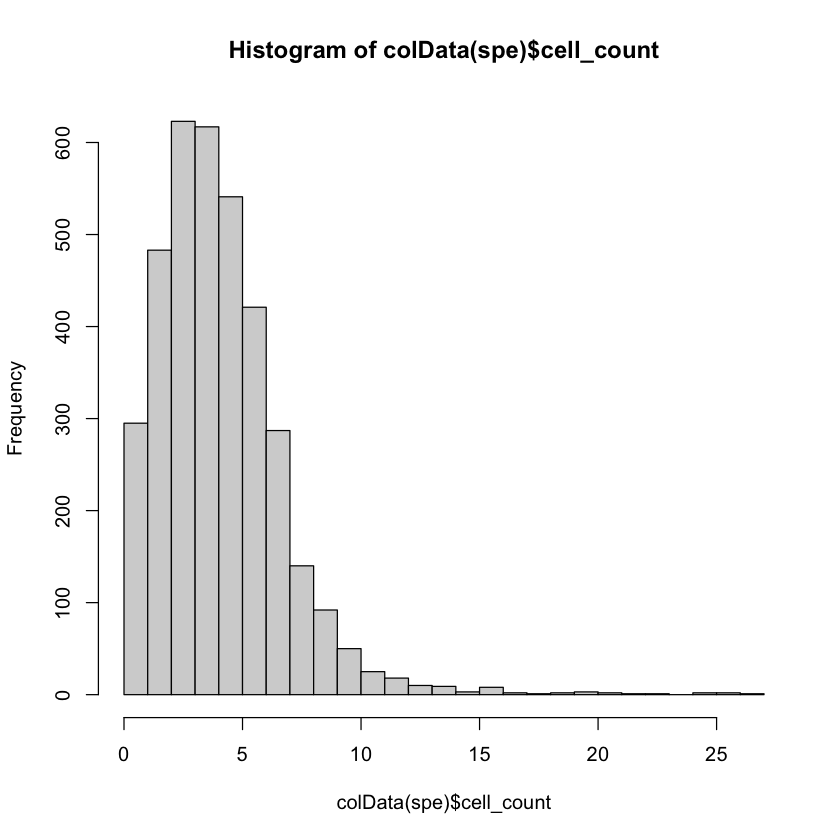

In [64]:
# histogram of cell counts
hist(colData(spe)$cell_count, breaks = 20)

In [66]:
# distribution of cells per spot
tbl_cells_per_spot <- table(colData(spe)$cell_count)

`geom_smooth()` using formula = 'y ~ x'
`stat_xsidebin()` using `bins = 30`. Pick better value with
`binwidth`.
`stat_ysidebin()` using `bins = 30`. Pick better value with
`binwidth`.


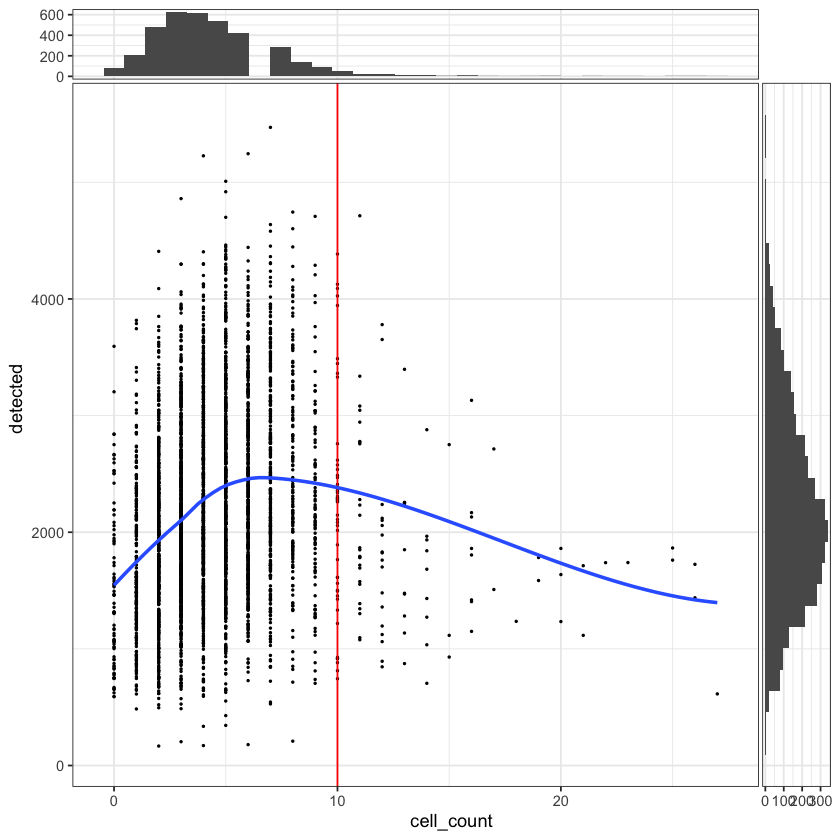

In [68]:
# plot number of expressed genes vs. number of cells per spot
plotSpotQC(spe, plot_type = "scatter", 
           x_metric = "cell_count", y_metric = "detected", 
           x_threshold = 10)

In [69]:
# select QC threshold for number of cells per spot
qc_cell_count <- colData(spe)$cell_count > 10
table(qc_cell_count)

qc_cell_count
FALSE  TRUE 
 3549    90 

In [71]:
colData(spe)$qc_cell_count <- qc_cell_count

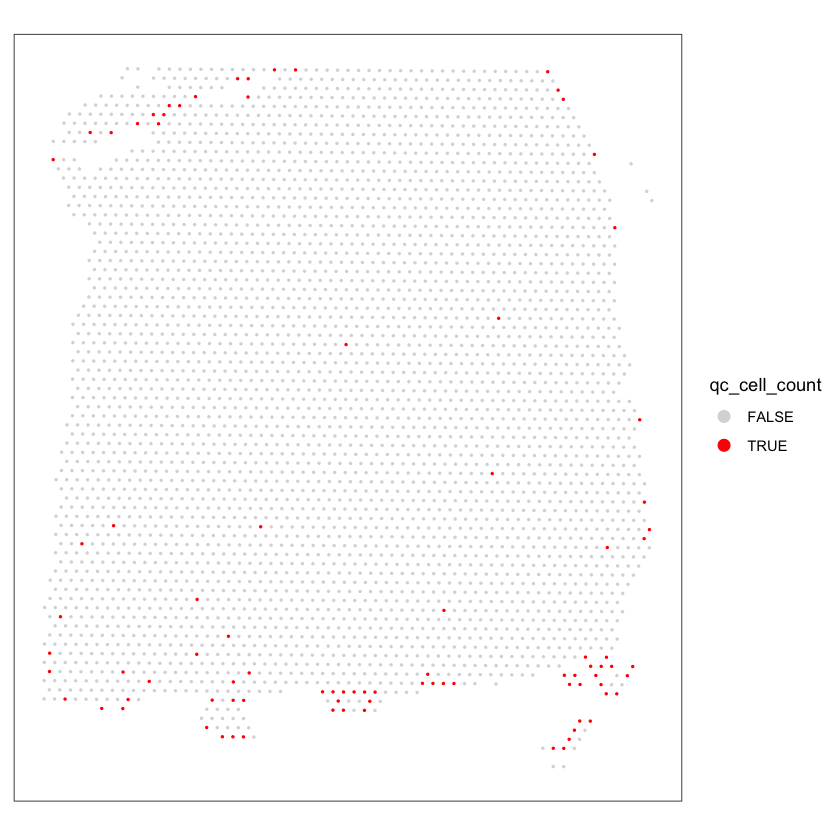

In [73]:
# check spatial pattern of discarded spots
plotSpotQC(spe, plot_type = "spot", 
           annotate = "qc_cell_count")

In [75]:
# number of discarded spots for each metric
apply(cbind(qc_lib_size, qc_detected, qc_mito, qc_cell_count), 2, sum)

qc_lib_size   qc_detected       qc_mito qc_cell_count 
            8             7            17            90

In [77]:
# combined set of discarded spots
discard <- qc_lib_size | qc_detected | qc_mito | qc_cell_count
table(discard)

discard
FALSE  TRUE 
 3524   115 

In [79]:
# store in object
colData(spe)$discard <- discard

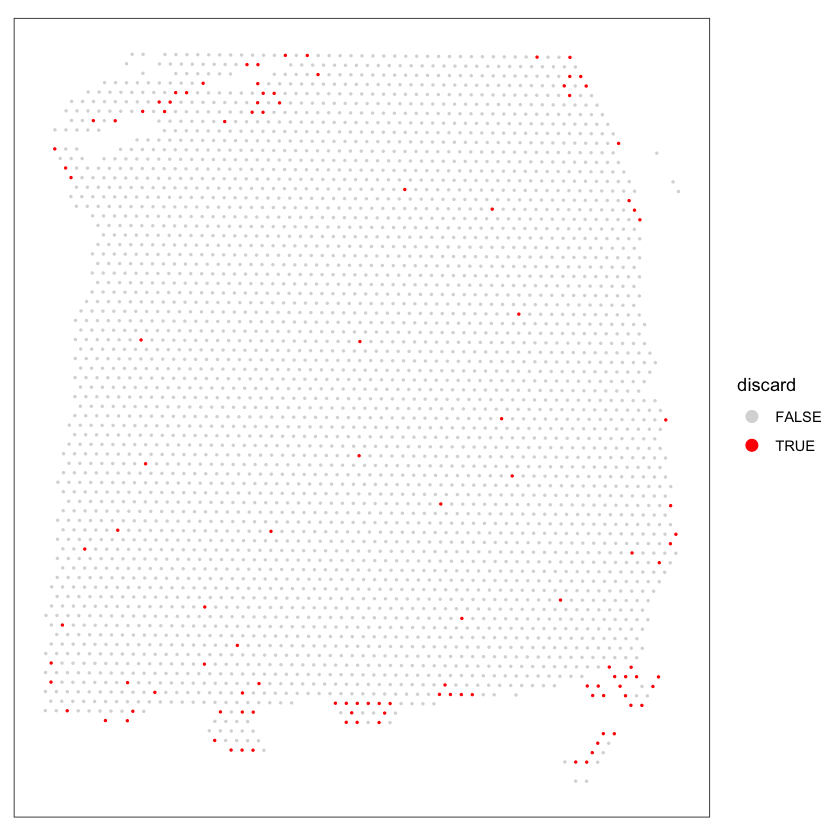

In [81]:
# check spatial pattern of combined set of discarded spots
plotSpotQC(spe, plot_type = "spot", 
           annotate = "discard")

In [83]:
# remove combined set of low-quality spots
spe <- spe[, !colData(spe)$discard]
dim(spe)

[1] 33538  3524

In [85]:
# distribution of cells per spot
tbl_cells_per_spot[1:13]


  0   1   2   3   4   5   6   7   8   9  10  11  12 
 84 211 483 623 617 541 421 287 140  92  50  25  18 

In [87]:
# as proportions
prop_cells_per_spot <- round(tbl_cells_per_spot / sum(tbl_cells_per_spot), 2)
prop_cells_per_spot[1:13]


   0    1    2    3    4    5    6    7    8    9   10   11   12 
0.02 0.06 0.13 0.17 0.17 0.15 0.12 0.08 0.04 0.03 0.01 0.01 0.00 

In [101]:
# save object(s)
saveRDS(spe, file = "'/Users/freddymappin/Desktop/BioinformaticHub/spatial/spe_qc.rds")

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'object' in selecting a method for function 'containsOutOfMemoryData': no slot of name "metadata" for this object of class "LoadedSpatialImage"


<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Normalization </div>
    <center>
  

In [111]:
# calculate library size factors
spe <- computeLibraryFactors(spe)


In [113]:
summary(sizeFactors(spe))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1321  0.6312  0.9000  1.0000  1.2849  3.7582 

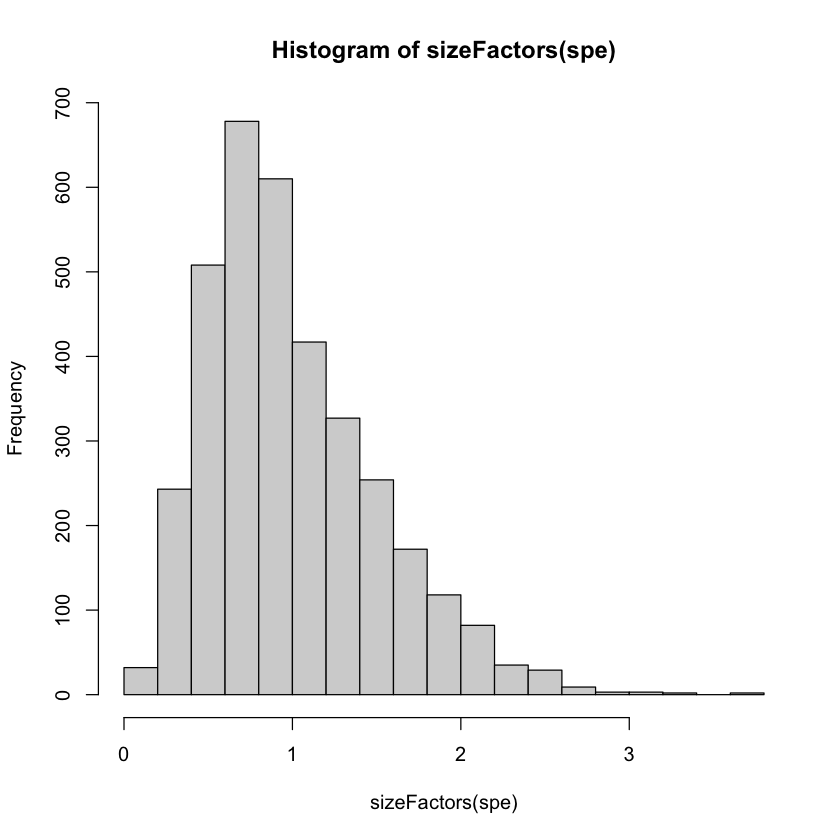

In [115]:
hist(sizeFactors(spe), breaks = 20)

In [117]:
# calculate logcounts and store in object
spe <- logNormCounts(spe)

# check
assayNames(spe)

[1] "counts"    "logcounts"

In [119]:
dim(counts(spe))

[1] 33538  3524

In [121]:
dim(logcounts(spe))

[1] 33538  3524

In [131]:
str(spe)

Formal class 'SpatialExperiment' [package "SpatialExperiment"] with 9 slots
  ..@ int_elementMetadata:Formal class 'DFrame' [package "S4Vectors"] with 6 slots
  .. .. ..@ rownames       : NULL
  .. .. ..@ nrows          : int 33538
  .. .. ..@ elementType    : chr "ANY"
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  .. .. ..@ listData       :List of 1
  .. .. .. ..$ rowPairs:Formal class 'DFrame' [package "S4Vectors"] with 6 slots
  .. .. .. .. .. ..@ rownames       : NULL
  .. .. .. .. .. ..@ nrows          : int 33538
  .. .. .. .. .. ..@ elementType    : chr "ANY"
  .. .. .. .. .. ..@ elementMetadata: NULL
  .. .. .. .. .. ..@ metadata       : list()
  .. .. .. .. .. ..@ listData       : Named list()
  ..@ int_colData        :Formal class 'DFrame' [package "S4Vectors"] with 6 slots
  .. .. ..@ rownames       : NULL
  .. .. ..@ nrows          : int 3524
  .. .. ..@ elementType    : chr "ANY"
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list(

Warning message:
“Not a validObject(): no slot of name "metadata" for this object of class "LoadedSpatialImage"”


  .. .. .. .. .. .. .. ..@ image: 'raster' chr [1:600, 1:600] "#aeb1b0ff" "#aeb2b0ff" "#adb1afff" "#adb1afff" ...
  .. .. .. .. .. .. .. ..@ NA   : NULL
  .. .. .. .. .. ..$ :Formal class 'LoadedSpatialImage' [package "SpatialExperiment"] with 2 slots


Warning message:
“Not a validObject(): no slot of name "metadata" for this object of class "LoadedSpatialImage"”


  .. .. .. .. .. .. .. ..@ image: 'raster' chr [1:2000, 1:2000] "#aeb2b1ff" "#aeb1b0ff" "#afb1afff" "#aeb1afff" ...
  .. .. .. .. .. .. .. ..@ NA   : NULL
  .. .. .. .. ..$ scaleFactor: num [1:2] 0.045 0.15
  .. ..$ scater          :List of 1
  .. .. ..$ pseudo.count: num 1
  ..@ rowRanges          :Formal class 'CompressedGRangesList' [package "GenomicRanges"] with 5 slots
  .. .. ..@ unlistData     :Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  .. .. .. .. ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. .. .. .. .. ..@ values         : Factor w/ 0 levels: 
  .. .. .. .. .. .. ..@ lengths        : int(0) 
  .. .. .. .. .. .. ..@ elementMetadata: NULL
  .. .. .. .. .. .. ..@ metadata       : list()
  .. .. .. .. ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. .. .. .. .. ..@ start          : int(0) 
  .. .. .. .. .. .. ..@ width          : int(0) 
  .. .. .. .. .. .. ..@ NAMES          : NULL
  .. .

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Feature Selection </div>
    <center>
  

In [135]:
# identify mitochondrial genes
is_mito <- grepl("(^MT-)|(^mt-)", rowData(spe)$gene_name)
table(is_mito)

is_mito
FALSE  TRUE 
33525    13 

In [137]:
# remove mitochondrial genes
spe <- spe[!is_mito, ]
dim(spe)

[1] 33525  3524

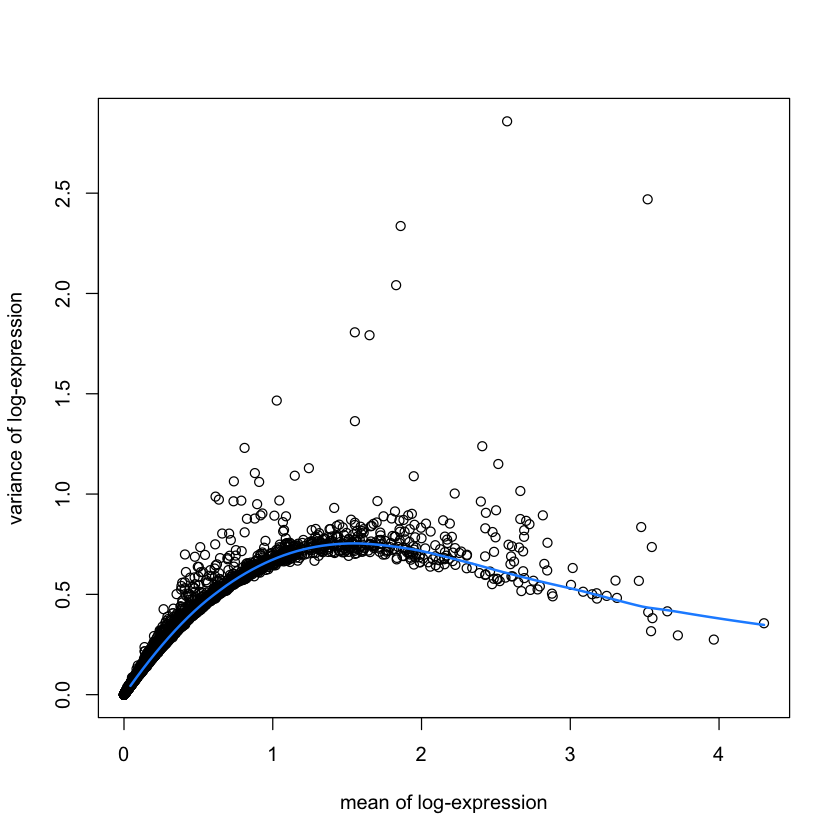

In [139]:
# fit mean-variance relationship
dec <- modelGeneVar(spe)

# visualize mean-variance relationship
fit <- metadata(dec)
plot(fit$mean, fit$var, 
     xlab = "mean of log-expression", ylab = "variance of log-expression")
curve(fit$trend(x), col = "dodgerblue", add = TRUE, lwd = 2)

In [141]:
# select top HVGs
top_hvgs <- getTopHVGs(dec, prop = 0.1)
length(top_hvgs)

[1] 1438

In [147]:
# save object(s)
saveRDS(top_hvgs, file = "top_hvgs.rds")

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Dimensionality Reduction </div>
    <center>
  

In [171]:
# compute PCA
set.seed(123)
spe <- runPCA(spe, subset_row = top_hvgs)

reducedDimNames(spe)

[1] "PCA"

In [173]:
dim(reducedDim(spe, "PCA"))

[1] 3524   50

In [175]:
set.seed(123)
spe <- runUMAP(spe, dimred = "PCA")

reducedDimNames(spe)

[1] "PCA"  "UMAP"

In [177]:
dim(reducedDim(spe, "UMAP"))

[1] 3524    2

In [179]:
# update column names for easier plotting
colnames(reducedDim(spe, "UMAP")) <- paste0("UMAP", 1:2)

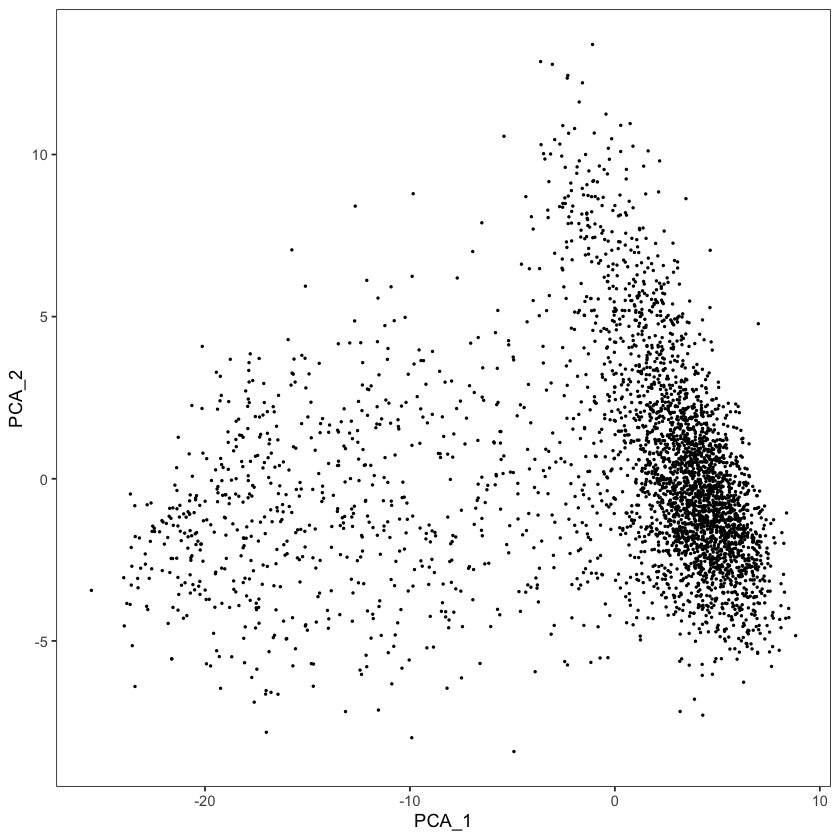

In [181]:
# plot top 2 PCA dimensions
plotDimRed(spe, plot_type = "PCA")

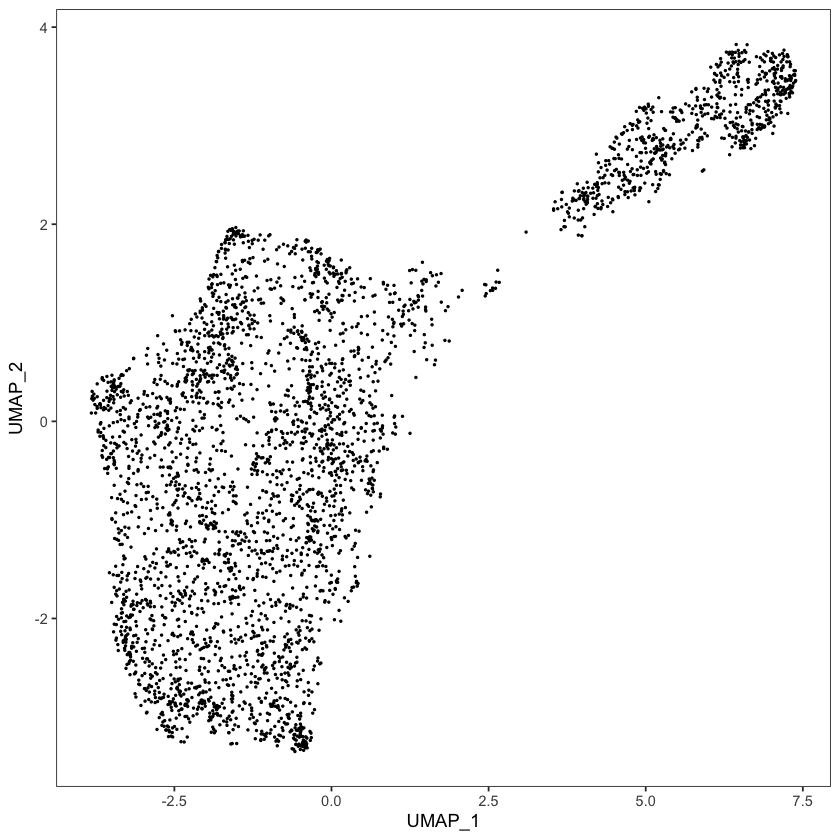

In [183]:
# plot top 2 UMAP dimensions
plotDimRed(spe, plot_type = "UMAP")

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Clustering </div>
    <center>
  

In [213]:
# graph-based clustering
set.seed(123)
k <- 10
g <- buildSNNGraph(spe, k = k, use.dimred = "PCA")
g_walk <- igraph::cluster_walktrap(g)
clus <- g_walk$membershi
table(clus)

clus
   1    2    3    4    5    6 
 359 1187  447  291  693  547 

In [219]:
# store cluster labels in column 'label' in colData
colLabels(spe) <- factor(clus)

In [221]:
# store cluster labels in column 'label' in colData
colLabels(spe) <- factor(clus)

In [217]:
# store cluster labels in column 'label' in colData
colLabels(spe) <- factor(clus)

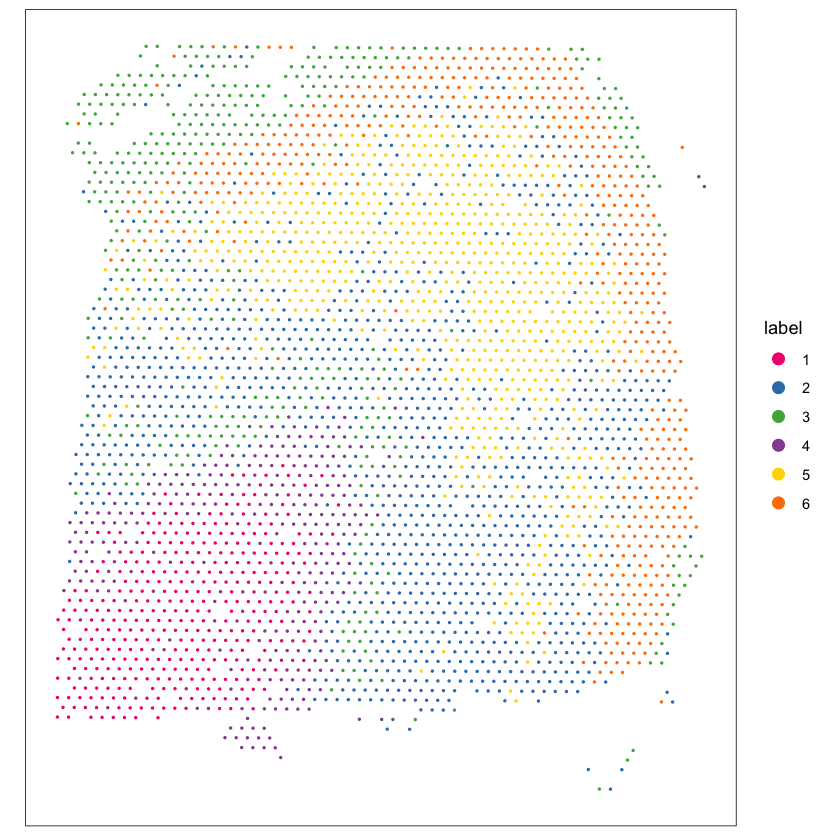

In [223]:
# plot clusters in spatial x-y coordinates
plotSpots(spe, annotate = "label", 
          pal = "libd_layer_colors")

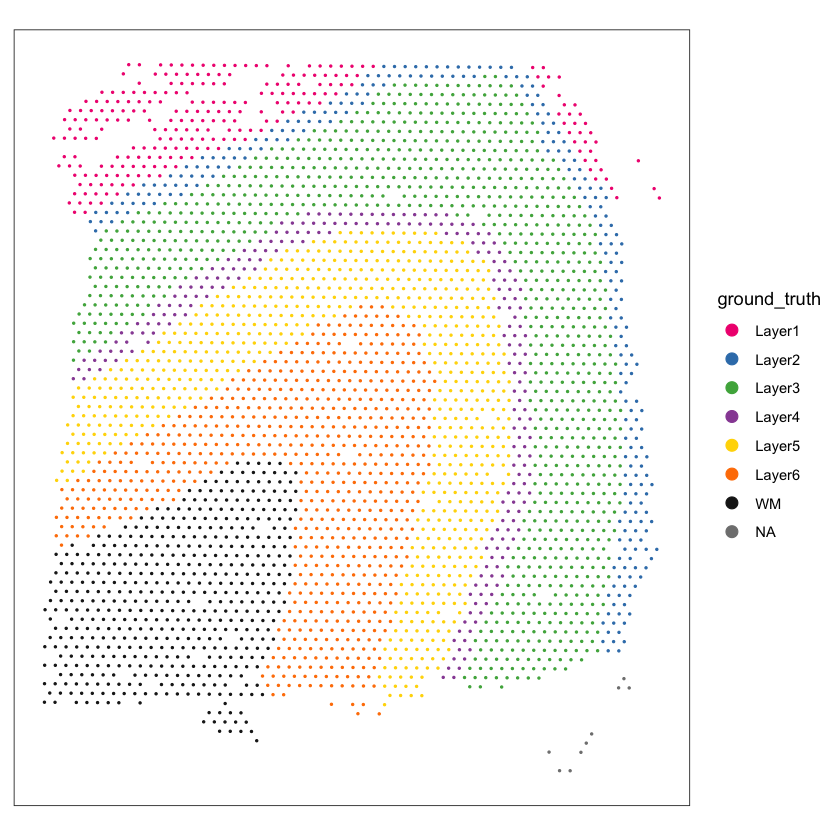

In [225]:
# plot ground truth labels in spatial coordinates
plotSpots(spe, annotate = "ground_truth", 
          pal = "libd_layer_colors")

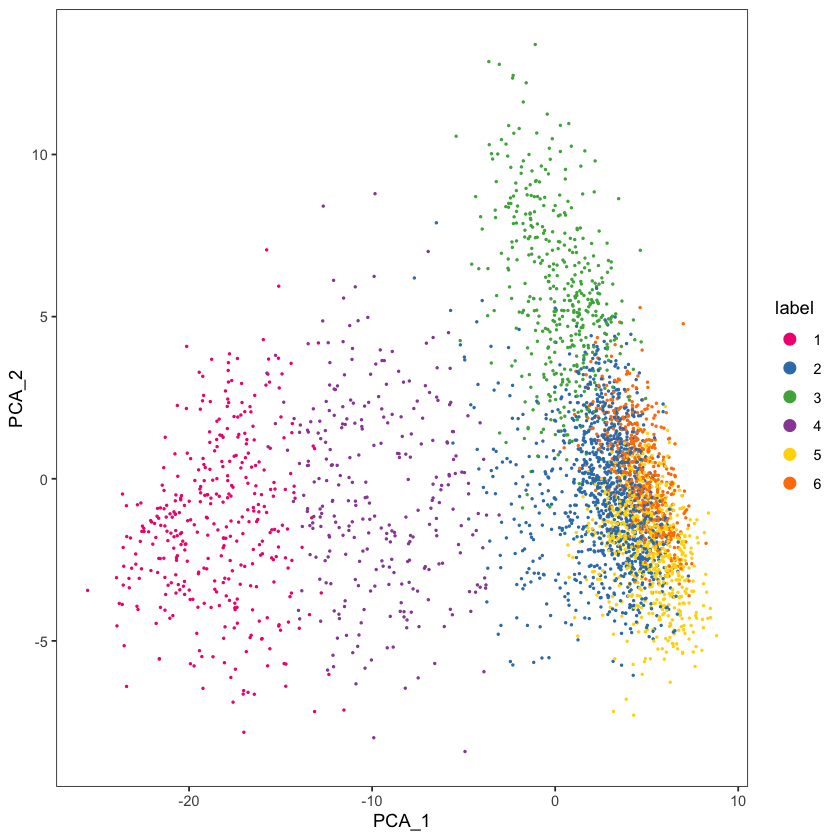

In [227]:
# plot clusters in PCA reduced dimensions
plotDimRed(spe, plot_type = "PCA", 
           annotate = "label", pal = "libd_layer_colors")

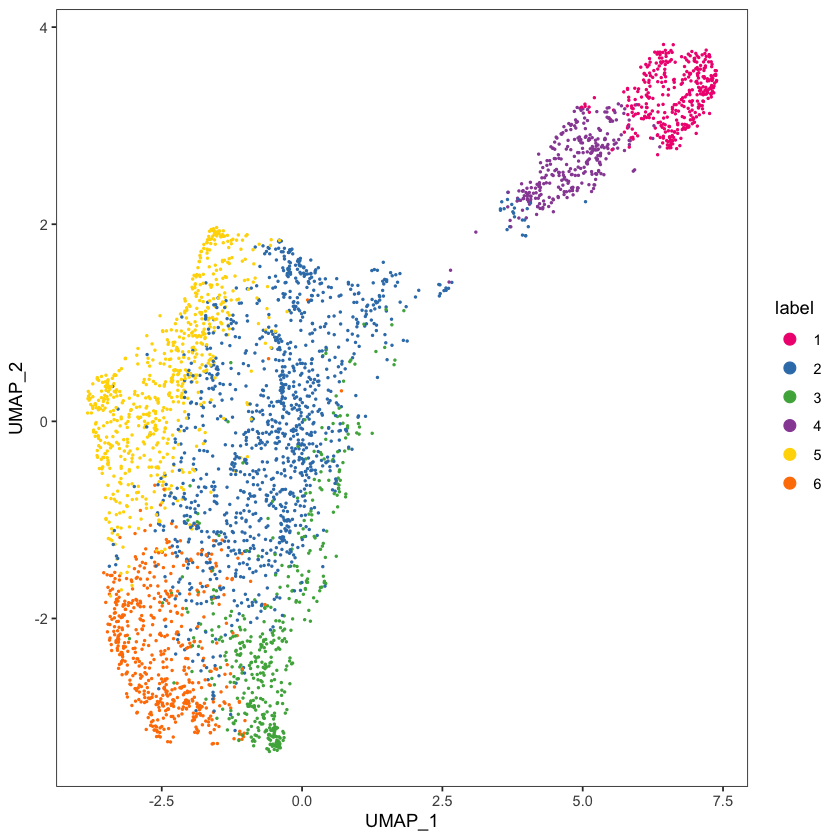

In [229]:
# plot clusters in UMAP reduced dimensions
plotDimRed(spe, plot_type = "UMAP", 
           annotate = "label", pal = "libd_layer_colors")

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Spot Deconvolution </div>
    <center>

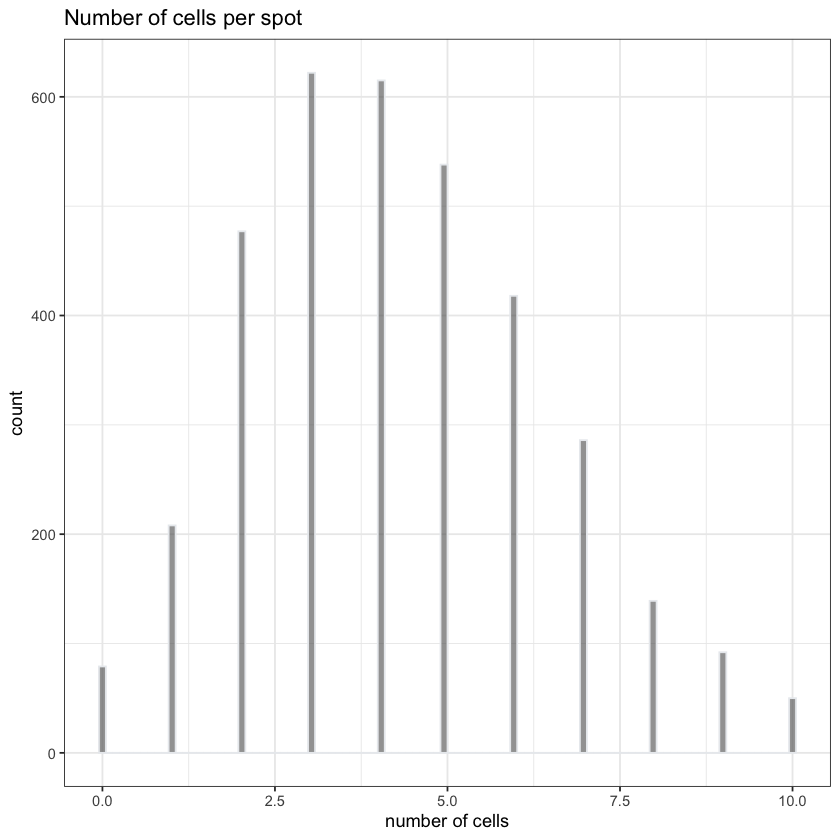

In [232]:
# plot number of cells per spot
plotSpotQC(spe, plot_type = "histogram", x_metric = "cell_count") + 
  xlab("number of cells") + 
  ggtitle("Number of cells per spot")

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Differential Expression </div>
    <center>

In [235]:
# set gene names as row names for easier plotting
rownames(spe) <- rowData(spe)$gene_name

# test for marker genes
markers <- findMarkers(spe, test = "binom", direction = "up")

# returns a list with one DataFrame per cluster
markers

List of length 6
names(6): 1 2 3 4 5 6

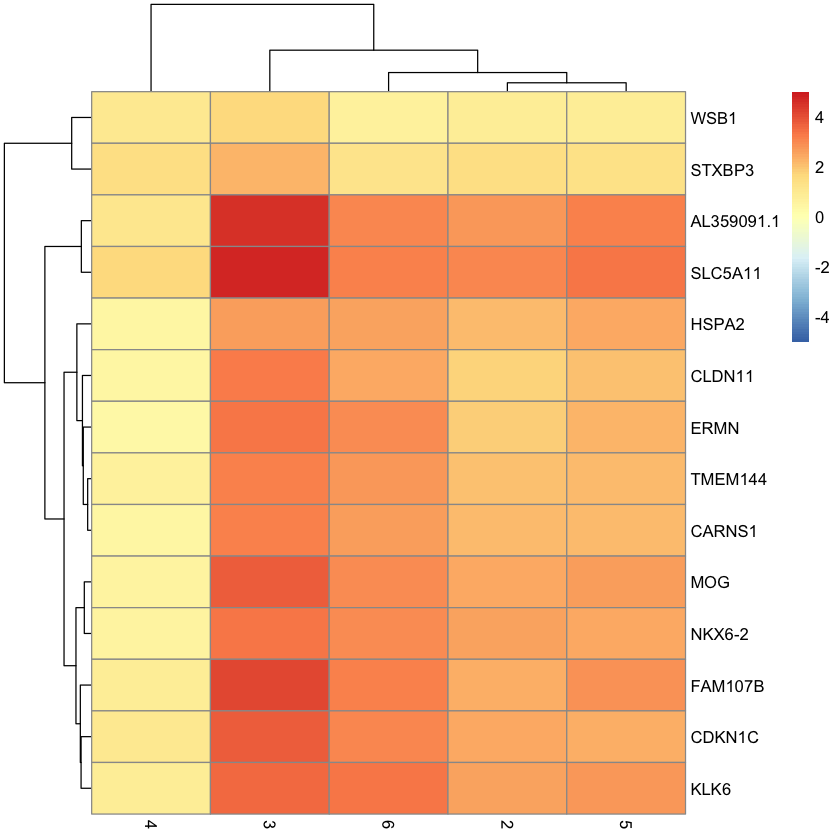

In [237]:
# plot log-fold changes for one cluster over all other clusters
# selecting cluster 1
interesting <- markers[[1]]
best_set <- interesting[interesting$Top <= 5, ]
logFCs <- getMarkerEffects(best_set)

pheatmap(logFCs, breaks = seq(-5, 5, length.out = 101))

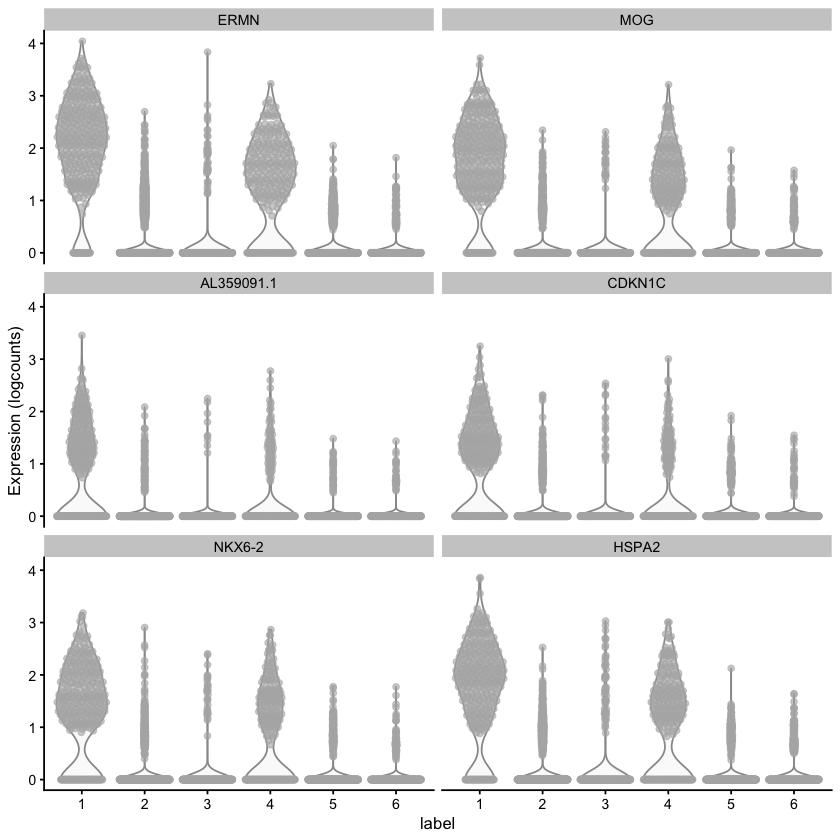

In [241]:
#plot log-transformed normalized expression of top genes for one cluster
top_genes <- head(rownames(interesting))

plotExpression(spe, x = "label", features = top_genes)